<h1> Step 1: Reading and Understanding the Data</h1>

In [110]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Read the data from csv file 
bike_df = pd.read_csv('day.csv')

In [112]:
# Checking the head of the dataset
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [113]:
# checking the shape of dataframe
bike_df.shape

(730, 16)

In [114]:
# describing the columns of dataframe
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [115]:
# get the information about columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [116]:
# checking for the null values in columns data
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
# renaming few columns for better reading
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [118]:
# Check the head of the dataset
bike_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [119]:
# Copying the dataframe into new data frame
bike_df_copy = bike_df.copy()

In [120]:
# checking the shape of new dataframe
bike_df_copy.shape

(730, 16)

In [121]:
# dropping the duplicates in data frame
bike_df_copy.drop_duplicates(inplace=True)

In [122]:
# re-verifying the shape of new dataframe
bike_df_copy.shape

(730, 16)

<h2>As per shape same shape in data frame after dropping of duplicates that means there is no duplicates in data frame</h2>

In [123]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.


bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [124]:
# Encoding/mapping the season column into integer

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [125]:
# Encoding/mapping the weekday column

bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [126]:
bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [127]:
# Encoding/mapping the weathersit column

bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [128]:
# check the head of the dataset

bike_df.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [129]:
# check the column info of the dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<h1> Step 2: Visualising the Data</h1>

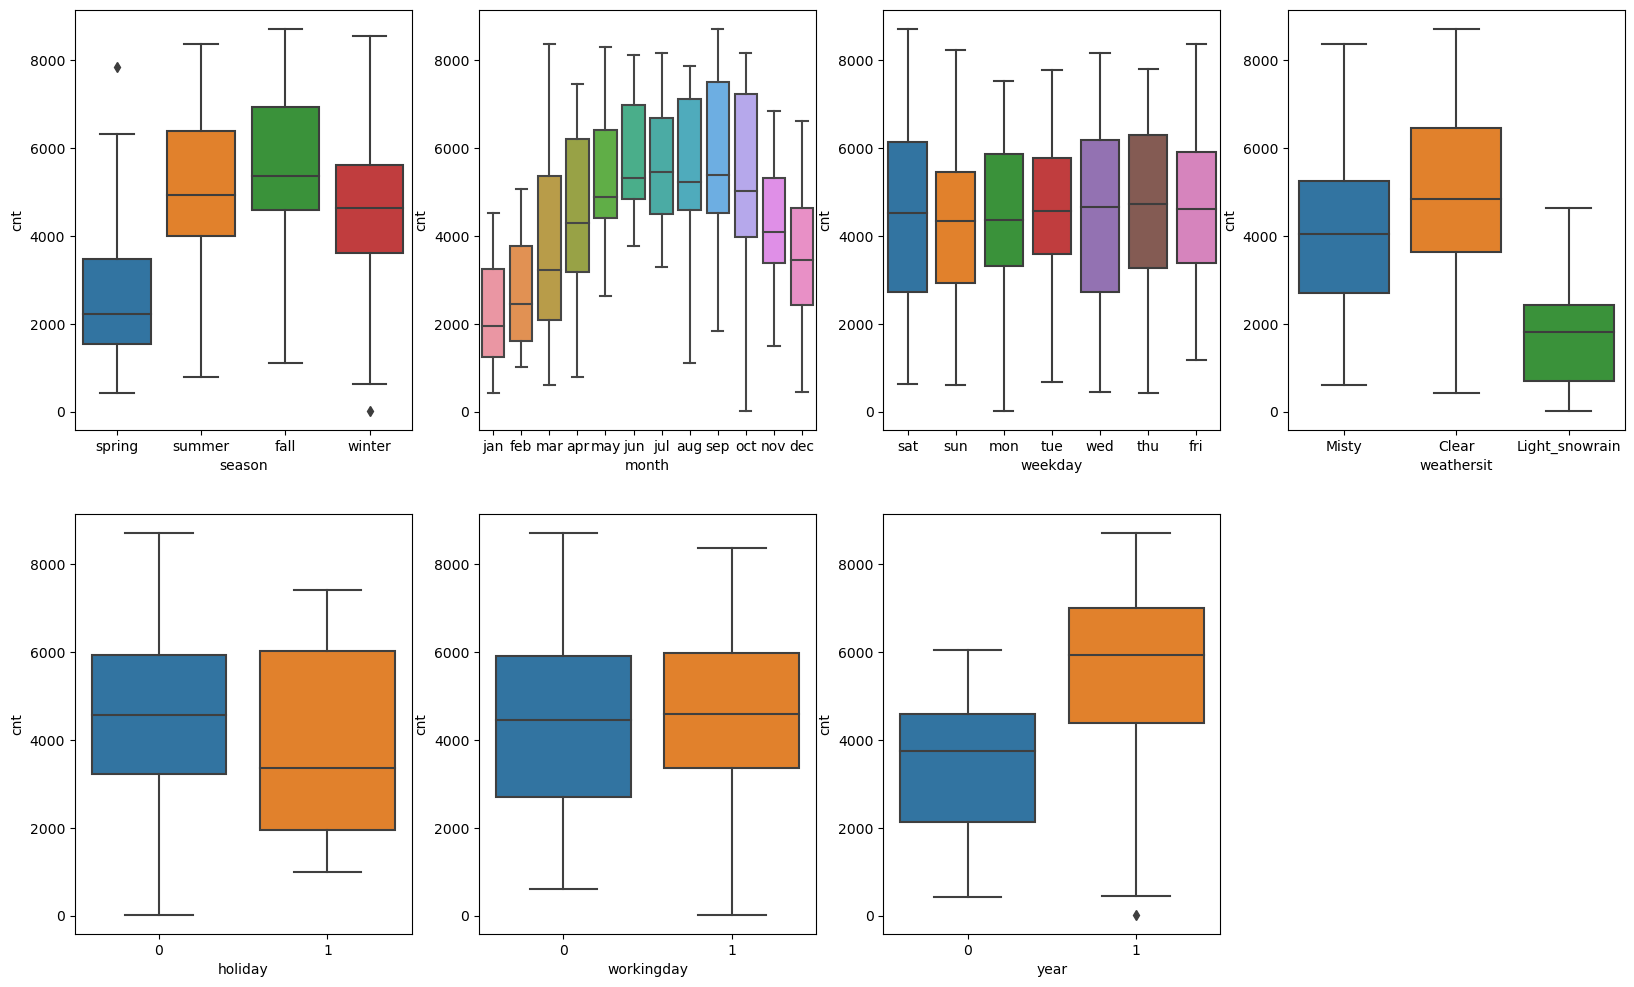

In [130]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike_df)
plt.show()

In [131]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

<Axes: xlabel='season', ylabel='cnt'>

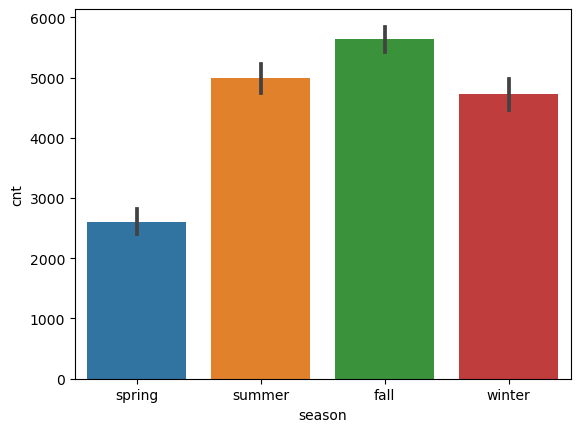

In [132]:
# plotting visualization for season column
sns.barplot(data=bike_df, x='season',y='cnt')

<Axes: xlabel='month', ylabel='cnt'>

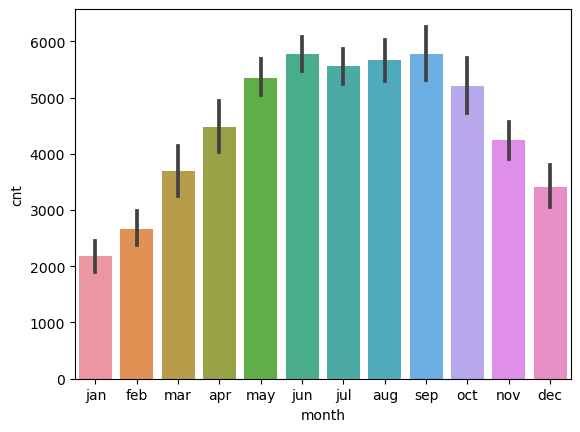

In [133]:
# plotting visualization for month column

sns.barplot(data=bike_df, x='month',y='cnt')


<Axes: xlabel='weathersit', ylabel='cnt'>

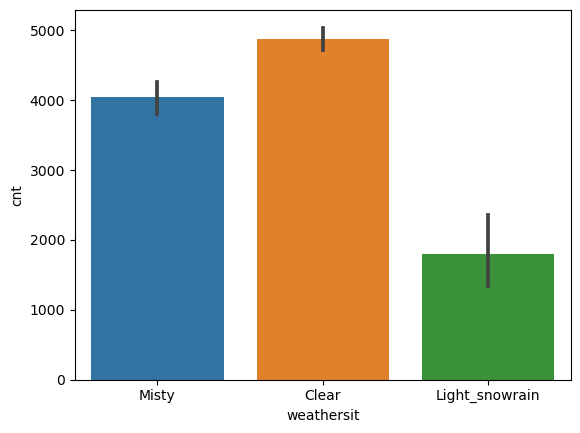

In [134]:
# plotting visualization for weathersit column

sns.barplot(data=bike_df, x='weathersit',y='cnt')

<Axes: xlabel='weekday', ylabel='cnt'>

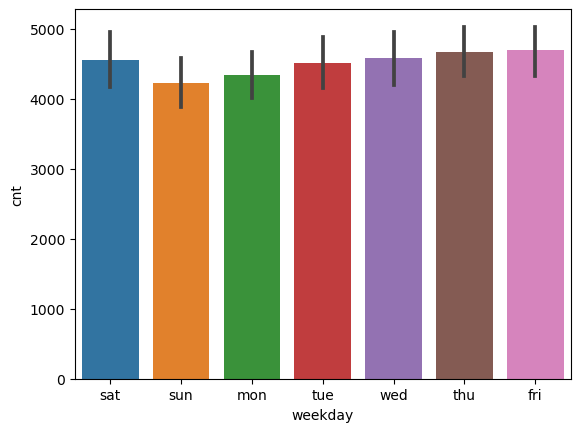

In [135]:
# plotting visualization for weekday column

sns.barplot(data=bike_df, x='weekday',y='cnt')

<Axes: xlabel='holiday', ylabel='cnt'>

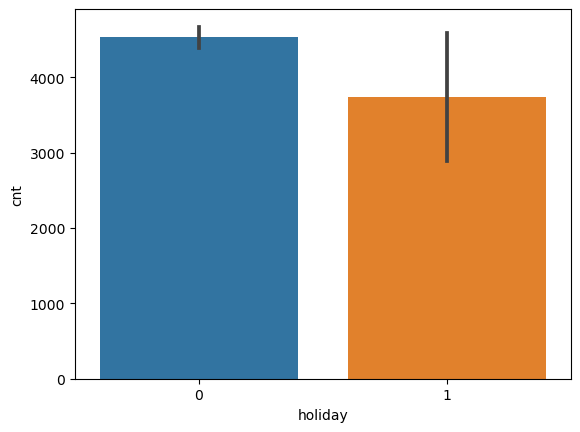

In [136]:
# plotting visualization for holiday column
sns.barplot(data=bike_df, x='holiday',y='cnt')


<Axes: xlabel='workingday', ylabel='cnt'>

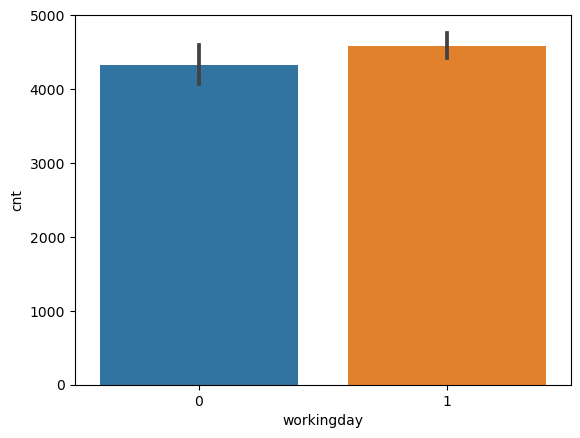

In [137]:
# plotting visualization for workingday column
sns.barplot(data=bike_df, x='workingday',y='cnt')


<Axes: xlabel='year', ylabel='cnt'>

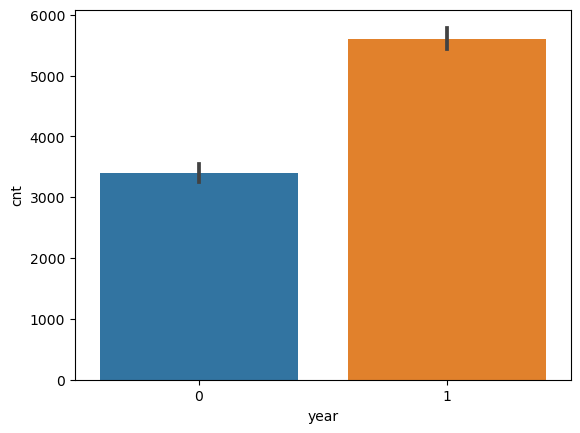

In [138]:
# plotting visualization for year column

sns.barplot(data=bike_df, x='year',y='cnt')

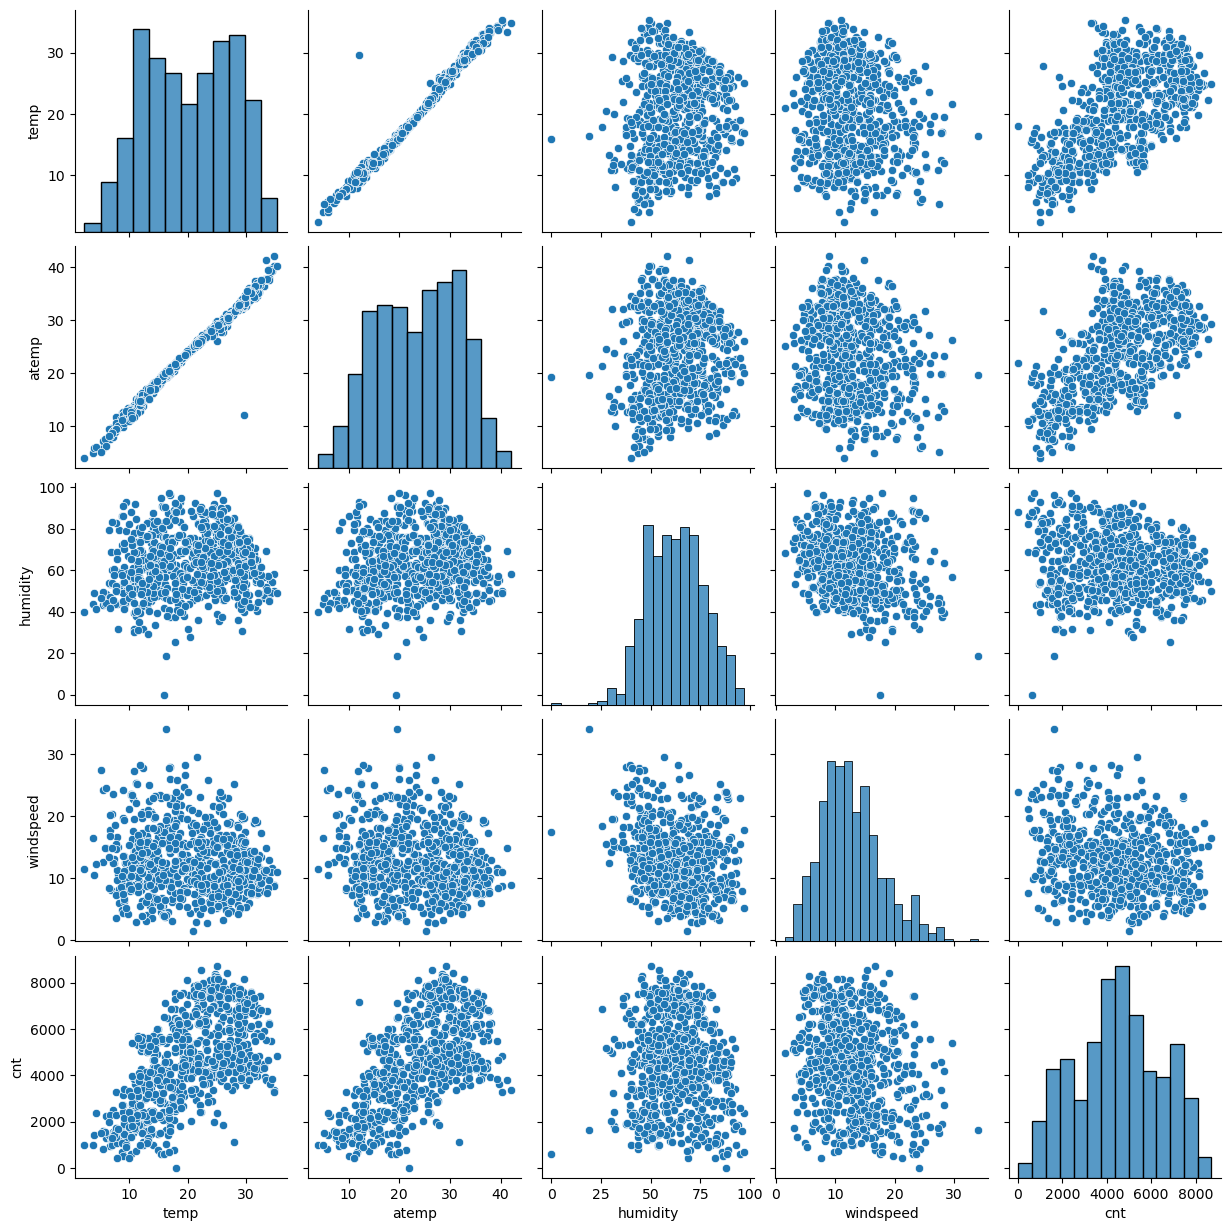

In [139]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

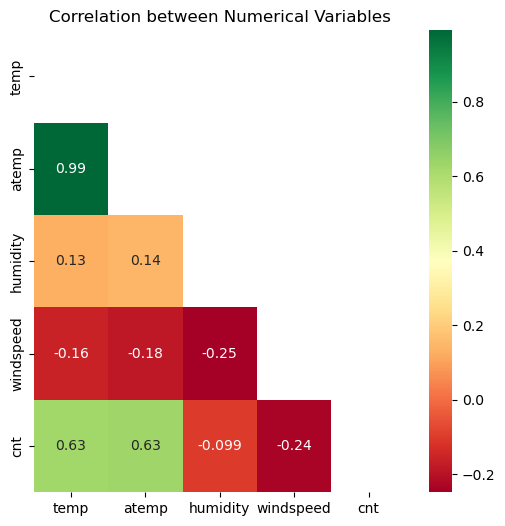

In [140]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(bike_df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

<h1> Step 3: Data Preparation</h1>

In [141]:
# Dummy variable creation for month, weekday, weathersit and season variables.


months_df=pd.get_dummies(bike_df.month,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [142]:
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [143]:
# Merging  the dataframe, with the dummy variable dataset. 
df_new = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [144]:

df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [145]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  jul             730 non-null    uint8  
 17  jun             730 non-null    uin

In [146]:
# dropping unnecessary columns as we have already created dummy variable out of it.
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [147]:
# check the head of new dataframe
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [148]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [149]:
# check the column info of new dataframe 

df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  jul             730 non-null    uint8  
 13  jun             730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

<h1>Step 4: Splitting the Data into Training and Testing Sets</h1>

In [150]:

# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [151]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [152]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [ ]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [153]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [154]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [155]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [156]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


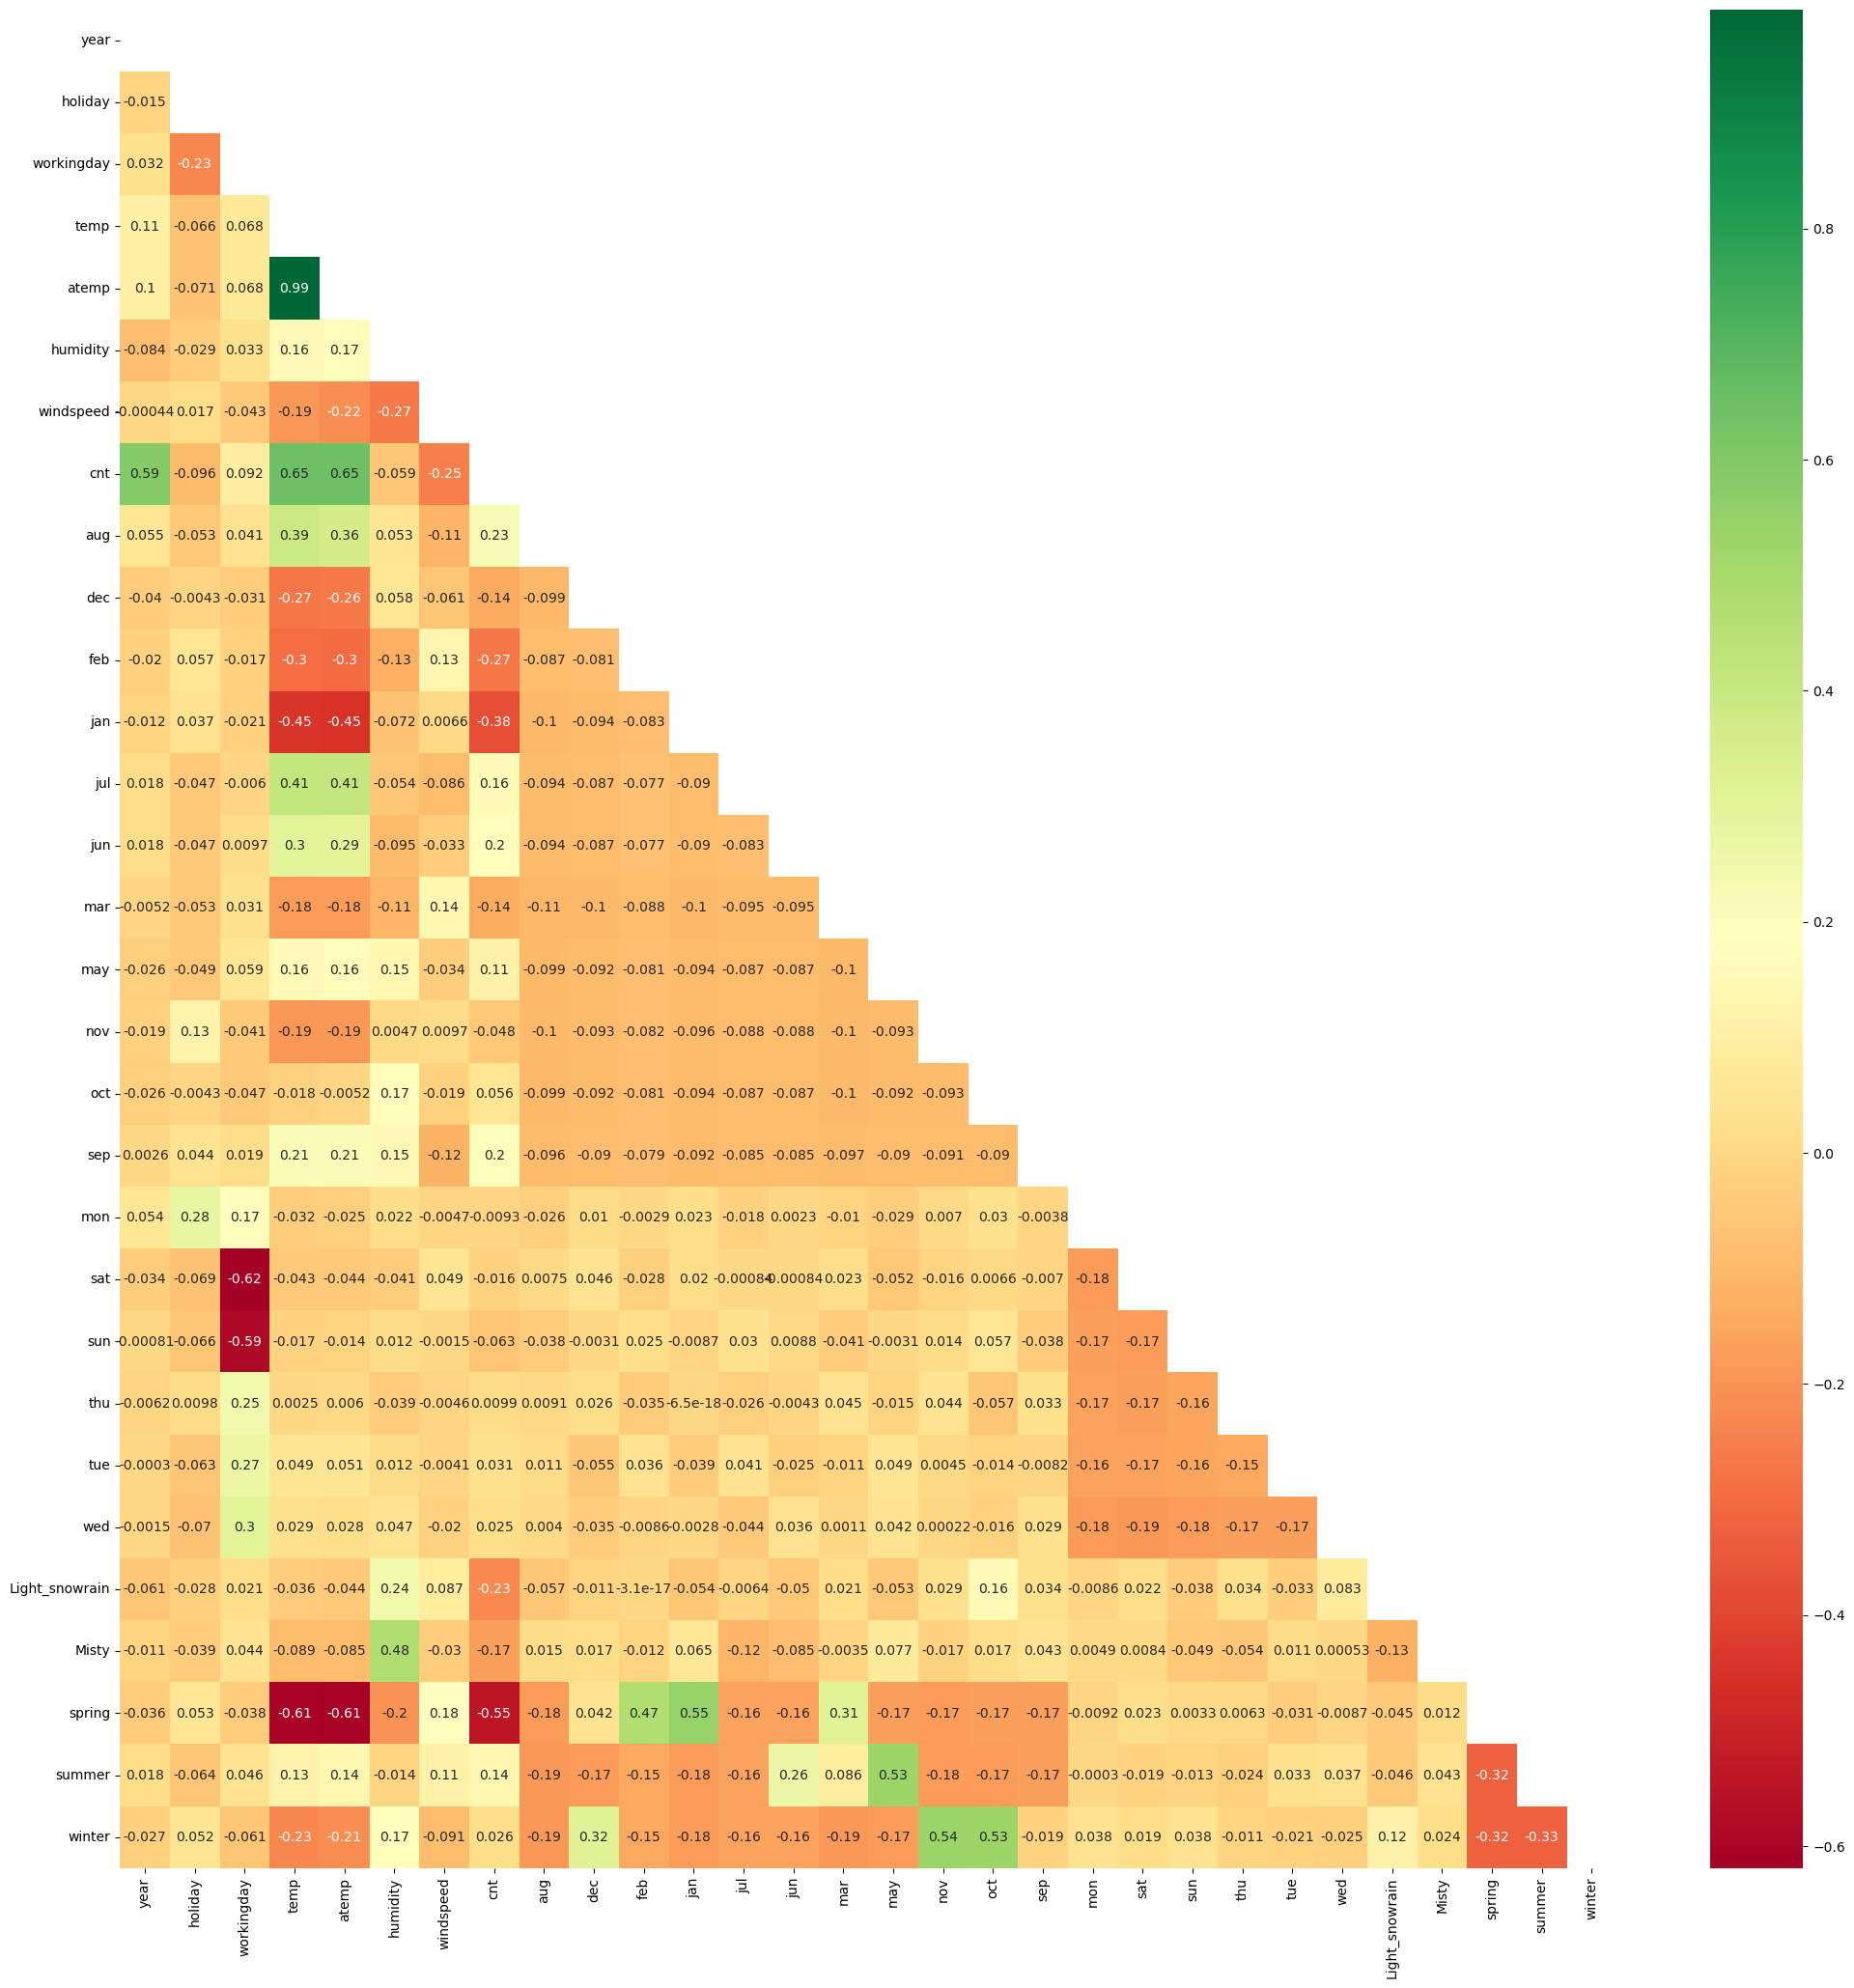

In [157]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

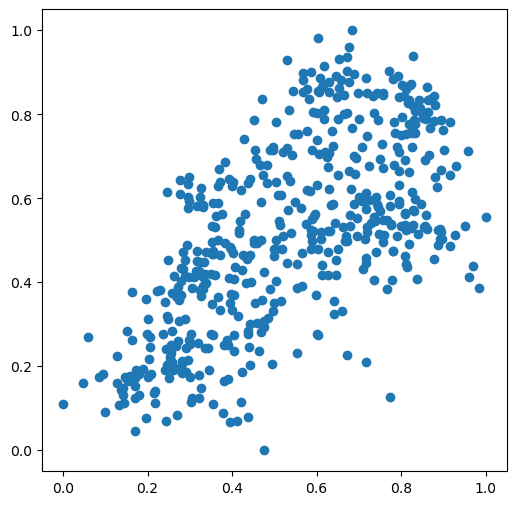

In [158]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [159]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [160]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [161]:
print(X_train.shape)
print(y_train.shape)
y_train.head()
X_train.head()

(510, 29)
(510,)


,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [162]:
X_train.columns= X_train.columns.astype(str)
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator =lm, n_features_to_select =15)

rfe = rfe.fit(X_train, y_train)

In [163]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [164]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'jul', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [165]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [166]:
# Generic function to calculate VIF of variables

def calculateVIF(bike_df):
    vif = pd.DataFrame()
    vif['Features'] = bike_df.columns
    vif['VIF'] = [variance_inflation_factor(bike_df.values, i) for i in range(bike_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [167]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [168]:
 #calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


humidity shows high VIF value.

<h1>Step 5: Building a linear model</h1>

In [169]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        23:05:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [170]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,jul,1.59


VIF values seems to be good now. But we will see if we can reduce further ?

In [171]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.60e-188
Time:                        23:05:33   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [172]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [173]:
X_train_lm = X_train_new.drop(['holiday'], axis = 1)
calculateVIF(X_train_lm)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,jul,1.59


In [174]:
X_train_lm.head()

,year,workingday,temp,windspeed,jan,jul,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0


In [175]:
 #Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_lm)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.68e-189
Time:                        23:05:41   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1657      0.031      5.

<h1>Step 6: Residual Analysis of the train data and validation</h1>

In [176]:
X_train_lm_3

,const,year,workingday,temp,windspeed,jan,jul,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1,0,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,0,0,1,0,1,0


In [177]:
y_train_pred = lr_3.predict(X_train_lm_3)

<h2>Normality of error terms</h2>

Text(0.5, 0, 'Errors')

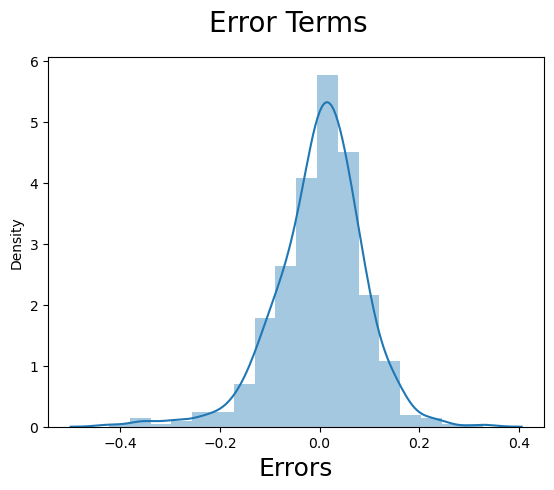

In [178]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

<h3>Multi Colinearity</h3>

In [179]:
calculateVIF(X_train_lm_3)

,Features,VIF
0,const,61.06
11,spring,5.03
3,temp,3.63
13,winter,3.44
12,summer,2.62
2,workingday,1.65
8,sat,1.63
5,jan,1.56
6,jul,1.48
7,sep,1.28


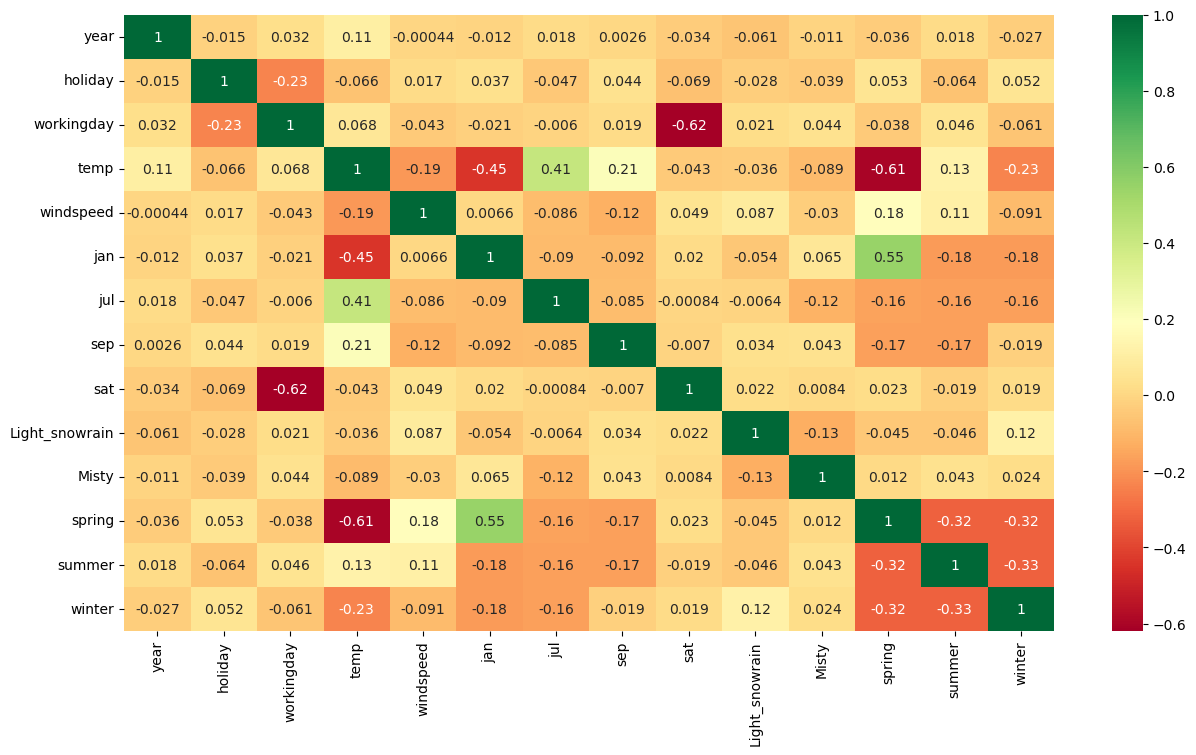

In [180]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

Linearity

Linearity can be observed from above visualizations.

In [185]:
y_train_predict = lr_3.predict(X_train_lm_3)


In [188]:
residuals = y_train - y_train_predict
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.069219201284189e-16


<h4>Homoscedasticity</h4>

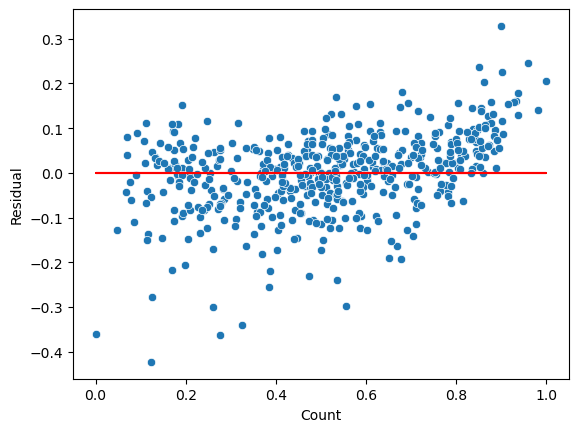

In [189]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<h4>Independence of residuals</h4>

Check 4. Error terms are independent of each other

Durbin-Watson value of final model lr_6 is 2.085, which signifies there is no autocorrelation.

That means there should not be any auto-correlation between error terms.

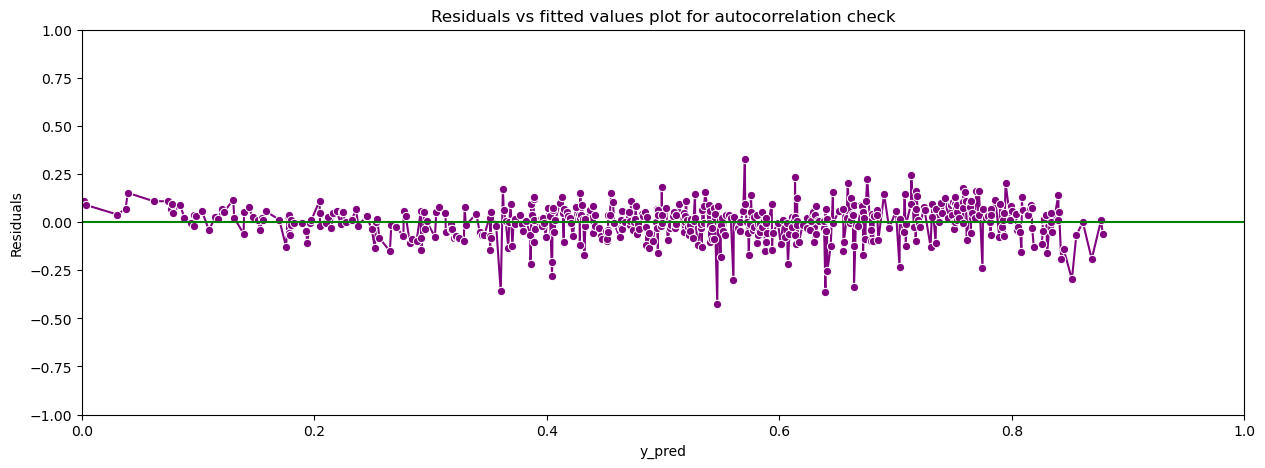

In [190]:
plt.figure(figsize=(15,5))
p = sns.lineplot(x=y_train_predict,y=residuals,marker='o',color='purple')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot(x=[0,1],y=[0,0],color='green')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

<h1>Step 7: Making Predictions Using the Final Model</h1>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [ ]:
# Applying scaling on the test dataset

# Apply scaler() to all the numeric columns except the 'yes-no' and 'dummy' variables in Testing dataset.
num_vars = ['atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [191]:
X_train_lm_3.head()

,const,year,workingday,temp,windspeed,jan,jul,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,1,0.815169,0.264686,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0,1,0
111,1.0,0,1,0.345824,0.380981,0,0,0,0,0,1,0,1,0


In [194]:
y_test = df_test.pop('cnt')
X_test = df_test

In [195]:
X_test_lm = sm.add_constant(X_test)

In [198]:
X_train_lm_3.columns

Index(['const', 'year', 'workingday', 'temp', 'windspeed', 'jan', 'jul', 'sep',
       'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [199]:
X_test_lm.columns

Index(['const', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [207]:
#dropped_columns = X_train.columns[~rfe.support_]
dropped_columns = ['holiday','humidity','atemp','aug','dec','feb','mar','may','nov','oct','mon','sun','thu','tue','wed','jun']

In [201]:
# Creating X_test_lm dataframe by dropping variables from X_test_lm to match model parameters
X_test_lm = X_test_lm.drop(dropped_columns, axis = 1)

In [209]:
print(X_test_lm.shape)
print(X_train_lm_3.shape)

(220, 14)
(510, 14)


In [214]:
# Making predictions using the finalized model
y_pred_lm = lr_3.predict(X_test_lm)

## Step 8. Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred_lm')

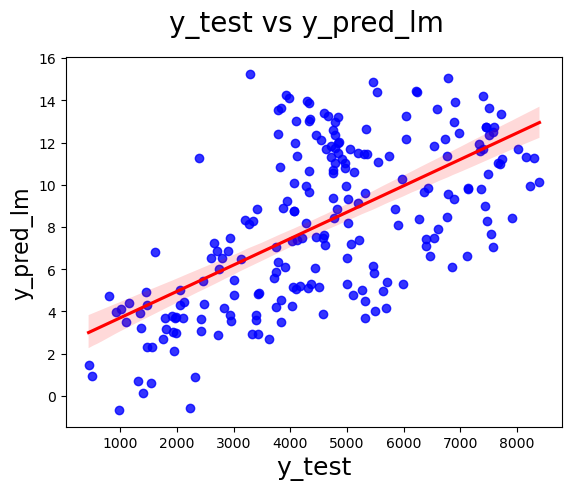

In [215]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
#plt.scatter(y_test, y_pred_lm)
sns.regplot(x=y_test,y=y_pred_lm, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
fig.suptitle('y_test vs y_pred_lm', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_lm', fontsize = 16) 

We can see that the equation of our best fitted line is:

𝐶𝑜𝑢𝑛𝑡=0.0666+0.236×𝑦𝑒𝑎𝑟−0.165xconst+0.472×𝑡𝑒𝑚𝑝−0.157×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑−0.060×𝑠𝑒𝑎𝑠𝑜𝑛𝑠𝑝𝑟𝑖𝑛𝑔−0.070×𝑚𝑛𝑡ℎ𝐽𝑢𝑙x0.0468+0.073×𝑚𝑛𝑡ℎ𝑆𝑒𝑝𝑡−0.275×𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝐿𝑖𝑔ℎ𝑡𝑅𝑎𝑖𝑛−0.080×𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝑀𝑖𝑠𝑡𝑦

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [216]:
# r2_score for 9 variables on test dataset and it's predcition
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred_lm)
print("r2 score is: ",r2_score)
n = len(X_test)
p = 9
print("and Adjusted r2 score is: ",1-(1-r2_score)*(n-1)/(n-p-1))

r2 score is:  -5.7345042944137585
and Adjusted r2 score is:  -6.023125907031491


Thus, for the model with 9 variables, the r-squared on training and test data is about 84.8% and 84.1% respectively. The Adjusted r-squared on the train and test set is 83.7% and 84.1% respectively.

In [217]:
print(type(lr_3.params))
print(abs(lr_3.params).sort_values(ascending = False)) # It's magnitude of the coefficinets that matters

<class 'pandas.core.series.Series'>
temp              0.472367
Light_snowrain    0.289642
year              0.234642
const             0.165727
windspeed         0.157212
Misty             0.080748
winter            0.077511
sep               0.073571
sat               0.066674
spring            0.060719
workingday        0.054630
jul               0.046815
summer            0.044839
jan               0.039761
dtype: float64


This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 9 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.

Suggestion to BoomBikes CLient
We can conclude from our model that below three features are the most influential features for BIke Rentals:

Feeling Temperature : with coefficient 0.412
𝑤𝑒𝑎𝑡ℎ𝑒𝑟𝑠𝑖𝑡𝐿𝑖𝑔ℎ𝑡𝑅𝑎𝑖𝑛 [Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ]: with coefficient 0.165
Year: with coefficient 0.234

<h3>Conclusion</h3>

In this case study, we built our first model considering one single variable. Then we finally added all the variables and then analyzed the model performance based on VIF and p-values. We finally arrived at a model using 9 features whose performance was good. We also plotted the error term to check if they are normally distributed. Our regression line also looks pretty clustered around the central line.